In [23]:
import csv
import pandas as pd
import numpy as np
import math
import scipy
from numpy.linalg import lstsq
from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
appVolDat = pd.read_csv('filingVolumes.csv')
appVolDat = appVolDat.iloc[1272:1391] #outlier
appVolDat = appVolDat.reset_index(drop=True)
maximum = max(appVolDat.volume)
appVolDat['vol'] = appVolDat.volume/maximum

trend = pd.read_csv('trend_costOfPatent.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend1'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

trend = pd.read_csv('trend_utilityVDesign.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend2'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

trend = pd.read_csv('trend_uspto.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend3'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

trend = pd.read_csv('trend_patentApplicationProcess.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend4'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

trend = pd.read_csv('trend_patentApplicationSearch.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend5'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

trend = pd.read_csv('trend_efs-web.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend6'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

trend = pd.read_csv('trend_patentsView.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend7'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

trend = pd.read_csv('trend_fileForPatent.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend8'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

trend = pd.read_csv('trend_patentFilingFees.csv').trends.iloc[24:144].reset_index(drop=True)/100
appVolDat['trend9'] = trend#(trend1 - np.mean(trend1)) / np.std(trend1)

for i in range(1,13):
    appVolDat['volShift'+str(i)] = appVolDat.vol.shift(i)
appVolDat = appVolDat.iloc[12:]

In [3]:
X_train = appVolDat.iloc[:84]
X_test = appVolDat.iloc[84:107] #last data point is outlier
#X_train, X_test = train_test_split(appVolDat, test_size=0.25, random_state=0)
print("Num rows in X_train:", len(X_train))
print("Num rows in X_test:", len(X_test))

Num rows in X_test: 23
Num rows in X_train: 84


In [4]:
def func(X,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z):
    parameters = [a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z]
    variables = ['volShift1', 'volShift2', 'volShift3', 'volShift4', 'volShift5', 'volShift6', 'volShift7', 'volShift8', 'volShift9', 'volShift10', 'volShift11', 'volShift12', 
                 'trend1','trend2','trend3','trend4','trend5','trend6','trend7','trend8','trend9',]
    sumFunc = 0.0
    for var in range(len(variables)):
        sumFunc += parameters[var]*X[variables[var]]
    return sumFunc

In [5]:
fitParams, fitCovariances = curve_fit(func, X_train, np.array(X_train['vol']))
print(fitParams)

[-0.11460571  0.04640811  0.08898412  0.14869581  0.1430395   0.08730534
  0.09995036 -0.10291923  0.07270733 -0.25949317 -0.18018593  0.67907019
  0.06264297  0.01429775  0.15065317 -0.06863694  0.05723635  0.02610932
 -0.0636133   0.00365002  0.01983938  1.          1.          1.          1.
  1.        ]


In [6]:
y_train = func(X_train, fitParams[0], fitParams[1], fitParams[2], fitParams[3], fitParams[4], fitParams[5], fitParams[6], 
            fitParams[7], fitParams[8], fitParams[9], fitParams[10], fitParams[11], fitParams[12], fitParams[13], fitParams[14],
            fitParams[15], fitParams[16], fitParams[17], fitParams[18], fitParams[19], fitParams[20], fitParams[21], fitParams[22],
            fitParams[23], fitParams[24], fitParams[25])
y_test = func(X_test, fitParams[0], fitParams[1], fitParams[2], fitParams[3], fitParams[4], fitParams[5], fitParams[6], 
            fitParams[7], fitParams[8], fitParams[9], fitParams[10], fitParams[11], fitParams[12], fitParams[13], fitParams[14],
            fitParams[15], fitParams[16], fitParams[17], fitParams[18], fitParams[19], fitParams[20], fitParams[21], fitParams[22],
            fitParams[23], fitParams[24], fitParams[25])

In [7]:
X_train.insert(2, 'volPred', y_train)
X_test.insert(2, 'volPred', y_test)

X_train['volPred'] = X_train['volPred'] * maximum
X_test['volPred'] = X_test['volPred'] * maximum

del X_train['vol']
del X_test['vol']

In [24]:
def mean_absolute_percentage_error(y_true, y_pred): 

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [27]:
print("Train MSE: ", mean_squared_error(X_train['volume'], X_train['volPred']))
print("Test  MSE: ", mean_squared_error(X_test['volume'], X_test['volPred']), '\n')
print("Train Percent Error: ", mean_absolute_percentage_error(X_train['volume'], X_train['volPred']), "%")
print("Test  Percent Error: ", mean_absolute_percentage_error(X_test['volume'], X_test['volPred']), '%\n')

Train MSE:  20590604.2521
Test  MSE:  23990394.0364 

Train Percent Error:  5.6658875112778615 %
Test  Percent Error:  7.470031601536074 %



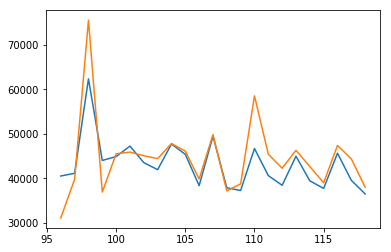

In [12]:
plt.plot(X_test['volume'])
plt.plot(X_test['volPred'])

In [13]:
X_test

,month,volume,volPred,trend1,trend2,trend3,trend4,trend5,trend6,trend7,...,volShift3,volShift4,volShift5,volShift6,volShift7,volShift8,volShift9,volShift10,volShift11,volShift12
96,1/1/2014,40503,31077.052355,0.39,0.32,0.68,0.09,0.54,0.29,0.15,...,0.541267,0.534141,0.514257,0.493603,0.514269,0.496215,0.429605,1.000000,0.500126,0.483889
97,2/1/2014,41112,39774.149895,0.71,0.00,0.68,0.05,0.49,0.43,0.09,...,0.490738,0.541267,0.534141,0.514257,0.493603,0.514269,0.496215,0.429605,1.000000,0.500126
98,3/1/2014,62356,75533.519278,0.55,0.42,0.69,0.02,0.53,0.10,0.04,...,0.596261,0.490738,0.541267,0.534141,0.514257,0.493603,0.514269,0.496215,0.429605,1.000000
99,4/1/2014,44000,36890.914670,0.62,0.22,0.69,0.14,0.35,0.00,0.13,...,0.487512,0.596261,0.490738,0.541267,0.534141,0.514257,0.493603,0.514269,0.496215,0.429605
100,5/1/2014,44872,45490.716472,0.65,0.68,0.65,0.02,0.48,0.11,0.09,...,0.494842,0.487512,0.596261,0.490738,0.541267,0.534141,0.514257,0.493603,0.514269,0.496215
101,6/1/2014,47230,45881.866971,0.60,0.00,0.76,0.14,0.42,0.24,0.18,...,0.750545,0.494842,0.487512,0.596261,0.490738,0.541267,0.534141,0.514257,0.493603,0.514269
102,7/1/2014,43508,45047.096217,0.47,0.25,0.69,0.11,0.41,0.12,0.12,...,0.529604,0.750545,0.494842,0.487512,0.596261,0.490738,0.541267,0.534141,0.514257,0.493603
103,8/1/2014,41927,44414.001504,0.33,0.75,0.67,0.18,0.41,0.11,0.05,...,0.540099,0.529604,0.750545,0.494842,0.487512,0.596261,0.490738,0.541267,0.534141,0.514257
104,9/1/2014,47693,47805.000084,0.53,0.12,0.69,0.05,0.27,0.44,0.19,...,0.568481,0.540099,0.529604,0.750545,0.494842,0.487512,0.596261,0.490738,0.541267,0.534141
105,10/1/2014,45378,46091.717717,0.64,0.23,0.69,0.07,0.33,0.21,0.20,...,0.523682,0.568481,0.540099,0.529604,0.750545,0.494842,0.487512,0.596261,0.490738,0.541267


In [19]:
X_test['month'] =  pd.to_datetime(X_test['month'], format='%Y-%m')
plot.plot(X_test['month'], X_test['volume'])

ValueError: time data '1/1/2014' doesn't match format specified